In [2]:
import pandas as pd
import numpy as np

import pickle

# gensim
from gensim import corpora, models, similarities, matutils

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import nltk
import spacy


Loading in game text data:

In [3]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/games_text_2016_2019.pickle', 'rb') as f:
    df = pickle.load(f)

In [287]:
df[df.id==56571125]

,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2
70756,failed,56571125,The Stroke Of Midnight,A detective themed mystery visual novel with a...,Video Games,a detective themed mystery visual novel with a...,a detective theme mystery visual novel with a ...


In [4]:
df.head()

,final_state,id,name,blurb,category_name
1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards
2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games
2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards
2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games
2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games


In [5]:
df.shape

(5902, 5)

In [6]:
X_blurb = df['blurb']

In [7]:
X_blurb.head()

1796    An artistic professional pack of playing cards...
2575    Make it rain pancakes in FAT STACKS. \nCreate ...
2594    Endless playability, stunning artwork and fant...
2665    In 'Coral', use dice to make shapes in 3D! In ...
2668    Online 3D Stores for businesses that blur 3D G...
Name: blurb, dtype: object

BACK UP. What I need to do is create functions or something to do my text preprocessing on the column ITSELF.

And then I load it into the vecotorizer

In [25]:
!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 211kB/s ta 0:00:011    86% |███████████████████████████▌    | 32.1MB 4.9MB/s eta 0:00:02
  Running setup.py install for en-core-web-sm ... done

    Linking successful
    /anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [8]:
from nltk.corpus import stopwords

In [9]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [10]:
df['blurb'].head()
df.head()

,final_state,id,name,blurb,category_name
1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards
2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games
2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards
2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games
2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games


In [11]:
df['blurb_processed'] = df['blurb'].apply(lambda x:pre_process(x))

In [12]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [13]:
from textblob import TextBlob, Word

In [14]:
def pre_process2(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #lemmatize with Spacy
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc])
    
    return text

In [15]:
df['blurb_processed_2'] = df['blurb'].apply(lambda x:pre_process2(x))

In [16]:
df.head()

,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2
1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards,an artistic professional pack of playing cards...,an artistic professional pack of playing card ...
2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games,make it rain pancakes in fat stacks create the...,make -PRON- rain pancake in fat stack create t...
2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards,endless playability stunning artwork and fanta...,endless playability stunning artwork and fanta...
2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games,in coral use dice to make shapes in d in islan...,in coral use dice to make shape in d in island...
2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games,online d stores for businesses that blur d gam...,online d store for business that blur d game w...


In [17]:
X_blurb_2 = df['blurb_processed_2']

In [18]:
tfidf = TfidfVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")


In [19]:
tfidf2 = TfidfVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")


In [20]:
tfidf3 = TfidfVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b", ngram_range=(1,2))


In [21]:
bag_of_words = tfidf2.fit_transform(X_blurb)

In [22]:
feature_names = tfidf2.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,aaa,aapo,aargh,ab,aba,abandonado,abandoned,abandonned,abbey,abc,...,zum,zur,zusammen,zweck,zwergen,zwiercies,zx,zy,zyde,zynvaded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Below I am trying the tfidf transform again, after preprocessing text

In [23]:
bag_of_words_2 = tfidf.fit_transform(X_blurb_2)

In [24]:
bag_of_words_2.shape

(5902, 10022)

In [25]:
feature_names_2 = tfidf.get_feature_names()
pd.DataFrame(bag_of_words_2.toarray(), columns = feature_names_2)

,aaa,aapo,aargh,ab,aba,abandon,abandonado,abandonned,abbey,abc,...,zur,zusamman,zusammen,zweck,zwergen,zwiercie,zx,zy,zyde,zynvad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(bag_of_words_2)
lsa.explained_variance_ratio_

array([0.00569487, 0.00868325, 0.00592887, 0.0045029 ])

In [28]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [29]:
display_topics(lsa, tfidf.get_feature_names(), 5)


Topic  0
pron, game, card, play, fun

Topic  1
card, playing, deck, design, print

Topic  2
pron, deck, playing, card, print

Topic  3
world, rpg, adventure, playing, fantasy


Ok so this is not working well yet...

In [30]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
#  Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa2 = TruncatedSVD(2)
doc_topic = lsa2.fit_transform(bag_of_words)
lsa2.explained_variance_ratio_

array([0.0035062, 0.0074047])

In [31]:
display_topics(lsa2, tfidf2.get_feature_names(), 5)


Topic  0
game, card, cards, playing, deck

Topic  1
cards, playing, deck, printed, custom


Going to try again with ngrams:

In [32]:
bag_of_words_3 = tfidf3.fit_transform(X_blurb_2)

In [33]:
bag_of_words_3.shape

(5902, 56032)

In [34]:
lsa3 = TruncatedSVD(4)
doc_topic = lsa3.fit_transform(bag_of_words_3)
lsa3.explained_variance_ratio_

array([0.00225564, 0.00421463, 0.00280057, 0.00206042])

In [35]:
display_topics(lsa3, tfidf3.get_feature_names(), 5)


Topic  0
pron, game, card, card game, play

Topic  1
card, playing card, playing, deck, print

Topic  2
game, card game, player, game player, fun

Topic  3
card game, card, pron, fun, play card


In [157]:
tfidf4 = TfidfVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b", ngram_range=(1,2), sublinear_tf=True)


In [211]:
tfidf5 = TfidfVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b", ngram_range=(1,2), sublinear_tf=True)
tfidf5.fit(X_blurb_2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='\\b[a-z][a-z]+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [158]:
bag_of_words_4 = tfidf4.fit(X_blurb_2)

In [159]:
bag_of_words_4_transform = tfidf4.transform(X_blurb_2)

In [38]:
bag_of_words_3.shape

(5902, 56032)

In [39]:
lsa4 = TruncatedSVD(20)
doc_topic = lsa4.fit_transform(bag_of_words_4)
lsa4.explained_variance_ratio_

array([0.00174973, 0.00374814, 0.00240708, 0.00200577, 0.00174532,
       0.00153183, 0.00147784, 0.00140342, 0.00137219, 0.0012976 ,
       0.00126706, 0.0012534 , 0.0012246 , 0.00121178, 0.00116889,
       0.00114738, 0.00113098, 0.00110763, 0.00108639, 0.0010621 ])

In [40]:
display_topics(lsa4, tfidf4.get_feature_names(), 20)


Topic  0
pron, game, card, card game, play, playing, player, deck, playing card, fun, game pron, new, world, make, friend, create, design, base, game player, pron pron

Topic  1
card, playing card, playing, deck, print, design, custom, deck playing, uspcc, play card, print uspcc, card deck, card inspire, magician, card print, custom deck, inspire, luxury, poker, card design

Topic  2
card game, game, card, player, game player, fun, strategy, fast, play, age, board, board game, fun card, strategic, family, minute, play card, fast paced, paced, base

Topic  3
adventure, world, rpg, game, fantasy, action, base, playing, role, set, role playing, playing game, story, adventure game, mobile, player, new, tabletop, open world, open

Topic  4
play, play card, deck, deck play, pron play, inspire, rpg, game play, play pron, play game, card inspire, world, unique, mobile, free, adventure, deck card, custom deck, easy, magician

Topic  5
world, card game, novel, visual, visual novel, card, fantas

do a plot of inertia, see where it levels off with # of components, and then run kmeans clustering on those components to come up with clusters for projects

In [304]:
feat_names = tfidf4.get_feature_names()

In [308]:
from pylab import *


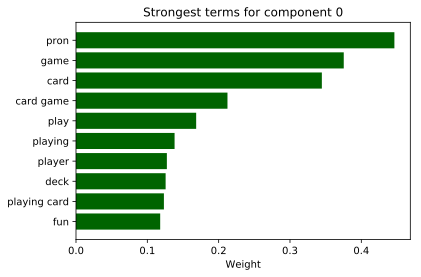

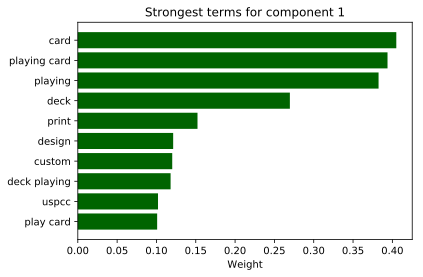

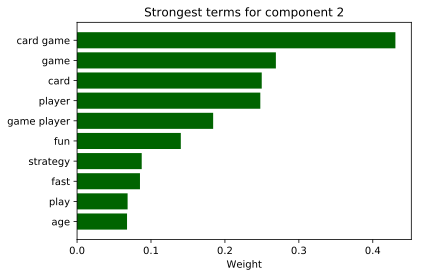

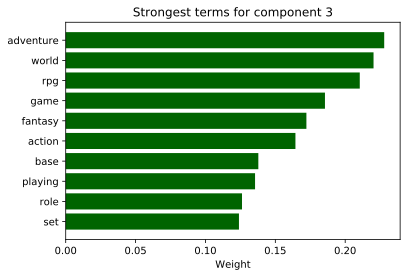

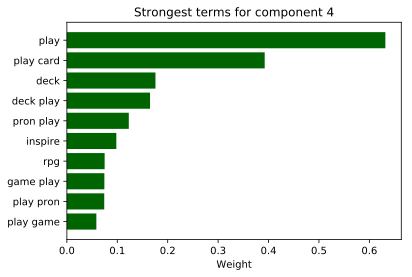

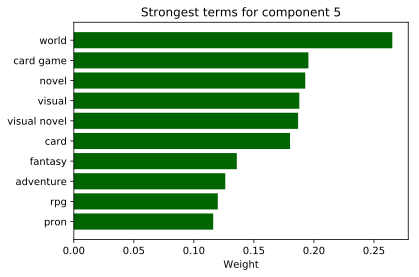

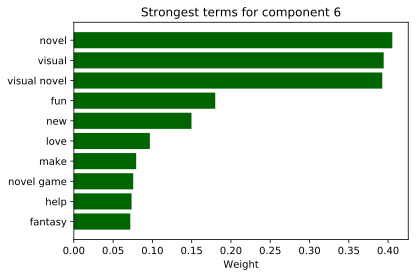

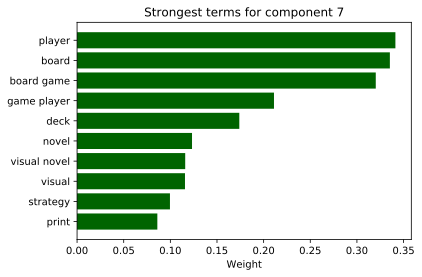

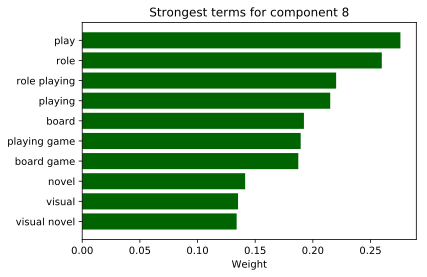

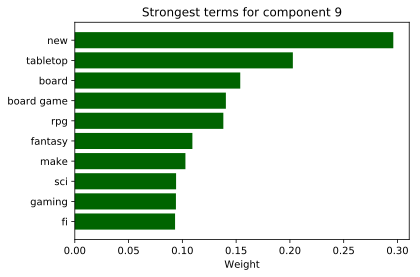

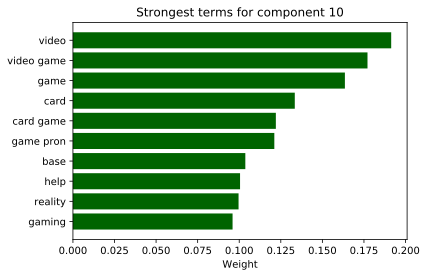

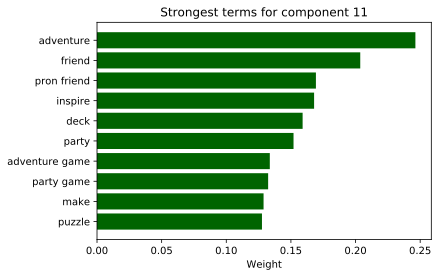

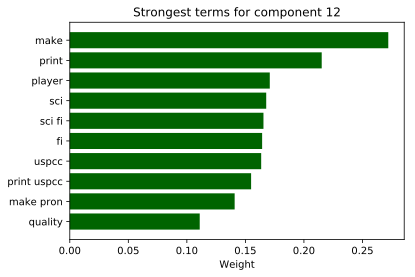

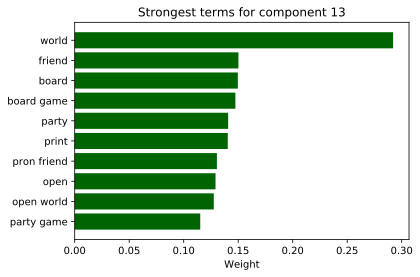

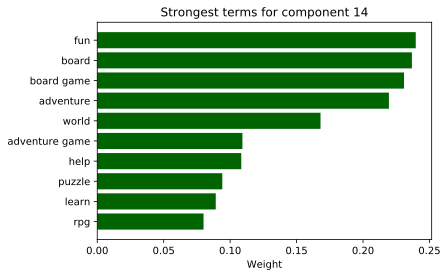

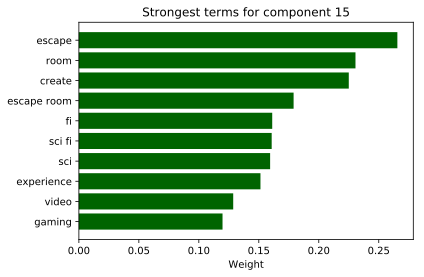

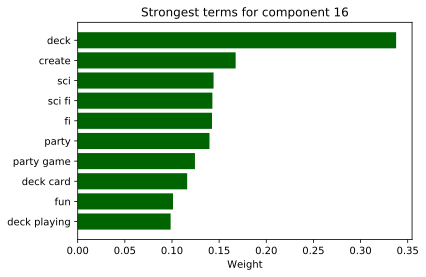

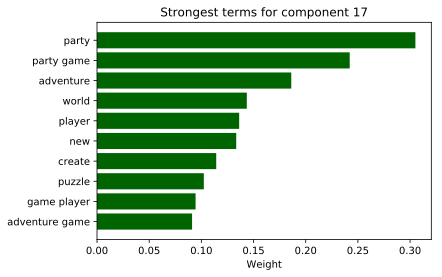

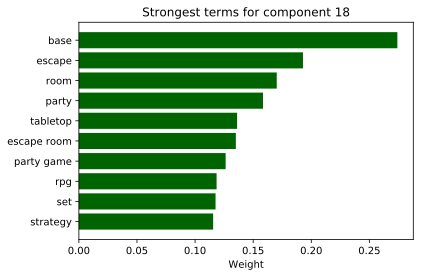

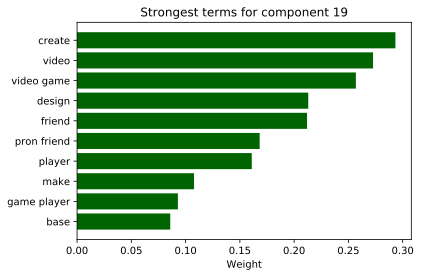

In [322]:
for compNum in range(0, 20):

    comp = lsa4.components_[compNum]
    
    # Sort the weights in the first component, and get the indeces
    indeces = np.argsort(comp).tolist()
    
    # Reverse the indeces, so we have the largest weights first.
    indeces.reverse()
    
    # Grab the top 10 terms which have the highest weight in this component.        
    terms = [feat_names[weightIndex] for weightIndex in indeces[0:10]]    
    weights = [comp[weightIndex] for weightIndex in indeces[0:10]]    
   
    # Display these terms and their weights as a horizontal bar graph.    
    # The horizontal bar graph displays the first item on the bottom; reverse
    # the order of the terms so the biggest one is on top.
    terms.reverse()
    weights.reverse()
    positions = np.arange(10) + .5    # the bar centers on the y axis
    
    plt.figure(compNum)
    barh(positions, weights, align='center', color='darkgreen')
    yticks(positions, terms)
    xlabel('Weight')
    title('Strongest terms for component %d' % (compNum))
    grid(False)
    show()

In [311]:
%config InlineBackend.figure_format = 'svg'


In [41]:
type(doc_topic)

numpy.ndarray

In [42]:
lsa4_df = pd.DataFrame(data=doc_topic)

In [43]:
lsa4_df.shape

(5902, 20)

In [44]:
lsa4_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.118766,0.182460,-0.037602,0.038939,-0.048892,-0.046611,0.001251,-0.006294,0.010233,-0.005970,-0.006676,-0.004561,0.023085,0.029665,-0.003810,0.003784,-0.000054,0.000972,-0.012741,0.026417
1,0.052764,-0.033607,-0.045281,-0.032657,-0.013082,-0.014322,0.010936,0.002551,-0.029429,0.026472,0.021774,0.010629,0.055882,-0.027455,0.014829,-0.019903,0.028357,0.008947,0.025654,0.052767
2,0.017983,0.001342,-0.003237,0.031355,0.005765,0.025151,0.009364,-0.000253,0.003074,0.012427,0.007717,-0.012621,-0.008298,-0.014354,-0.013619,-0.012021,0.005546,0.003372,0.021002,-0.008529
3,0.035802,-0.011526,-0.010439,0.004968,-0.004683,-0.007059,0.004393,0.018622,-0.012417,0.026625,-0.017173,0.019009,0.046798,-0.012569,-0.012555,-0.057746,0.018758,-0.012114,0.045525,0.010689
4,0.085047,-0.055662,-0.040012,0.035371,0.012490,-0.002498,-0.031839,0.000353,-0.022461,-0.033537,0.030959,-0.055708,-0.033630,0.028152,-0.002298,0.037401,0.035000,0.018628,0.008067,-0.015034


In [45]:
lsa4_df = lsa4_df.add_prefix('topic_')

In [46]:
lsa4_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0.118766,0.182460,-0.037602,0.038939,-0.048892,-0.046611,0.001251,-0.006294,0.010233,-0.005970,-0.006676,-0.004561,0.023085,0.029665,-0.003810,0.003784,-0.000054,0.000972,-0.012741,0.026417
1,0.052764,-0.033607,-0.045281,-0.032657,-0.013082,-0.014322,0.010936,0.002551,-0.029429,0.026472,0.021774,0.010629,0.055882,-0.027455,0.014829,-0.019903,0.028357,0.008947,0.025654,0.052767
2,0.017983,0.001342,-0.003237,0.031355,0.005765,0.025151,0.009364,-0.000253,0.003074,0.012427,0.007717,-0.012621,-0.008298,-0.014354,-0.013619,-0.012021,0.005546,0.003372,0.021002,-0.008529
3,0.035802,-0.011526,-0.010439,0.004968,-0.004683,-0.007059,0.004393,0.018622,-0.012417,0.026625,-0.017173,0.019009,0.046798,-0.012569,-0.012555,-0.057746,0.018758,-0.012114,0.045525,0.010689
4,0.085047,-0.055662,-0.040012,0.035371,0.012490,-0.002498,-0.031839,0.000353,-0.022461,-0.033537,0.030959,-0.055708,-0.033630,0.028152,-0.002298,0.037401,0.035000,0.018628,0.008067,-0.015034


In [47]:
df_topics = df.reset_index()
df_topics.head()

,index,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2
0,1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards,an artistic professional pack of playing cards...,an artistic professional pack of playing card ...
1,2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games,make it rain pancakes in fat stacks create the...,make -PRON- rain pancake in fat stack create t...
2,2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards,endless playability stunning artwork and fanta...,endless playability stunning artwork and fanta...
3,2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games,in coral use dice to make shapes in d in islan...,in coral use dice to make shape in d in island...
4,2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games,online d stores for businesses that blur d gam...,online d store for business that blur d game w...


In [1]:
a

NameError: name 'a' is not defined

In [48]:
df_topics = pd.merge(df_topics, lsa4_df, left_index=True, right_index=True)

In [49]:
df_topics.shape

(5902, 28)

In [50]:
df_topics.head()

,index,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2,topic_0,topic_1,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards,an artistic professional pack of playing cards...,an artistic professional pack of playing card ...,0.118766,0.182460,...,-0.006676,-0.004561,0.023085,0.029665,-0.003810,0.003784,-0.000054,0.000972,-0.012741,0.026417
1,2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games,make it rain pancakes in fat stacks create the...,make -PRON- rain pancake in fat stack create t...,0.052764,-0.033607,...,0.021774,0.010629,0.055882,-0.027455,0.014829,-0.019903,0.028357,0.008947,0.025654,0.052767
2,2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards,endless playability stunning artwork and fanta...,endless playability stunning artwork and fanta...,0.017983,0.001342,...,0.007717,-0.012621,-0.008298,-0.014354,-0.013619,-0.012021,0.005546,0.003372,0.021002,-0.008529
3,2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games,in coral use dice to make shapes in d in islan...,in coral use dice to make shape in d in island...,0.035802,-0.011526,...,-0.017173,0.019009,0.046798,-0.012569,-0.012555,-0.057746,0.018758,-0.012114,0.045525,0.010689
4,2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games,online d stores for businesses that blur d gam...,online d store for business that blur d game w...,0.085047,-0.055662,...,0.030959,-0.055708,-0.033630,0.028152,-0.002298,0.037401,0.035000,0.018628,0.008067,-0.015034


In [114]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/games_and_lsatopics.pickle', 'wb') as to_write:
    pickle.dump(df_topics, to_write)

IN the interest of getting to my MVP, I'm going to move onto modeling with these 20 topics. 

MVP Steps:

 - Create models - RF and Logistic
     - Setup structure for this - i.e. cross val, metrics, etc.
     - Create models with and without LSA components (and maybe ONLY LSA components)
     - Create baseline using %rate of $ / %rate needed > 1, see how it compares to both

Future Steps:
 - add specific stop words (game, etc) and stemming
 - NMF
 - LDA
 - Look into Inertia scores for # of topics?
 - Further EDA for model (Consider adding more categories)
 - Go back to modelling. If haven't found reason for # of topics, CV on this
 - Consider adding more categories
 - Presentation Slides
 - Clustering on topics (if not LDA)
 - Recommender

Below, going to try out NMF using same bag of words I landed on with LSA, and see what comes through:

Creating models on 10, 15, 20, and 25 topics. Will do the same with LSA, and save dataframes for all 8 versions, and then cluster on each. Whichever seems to make the clusters that make most sense, I'll pick

First, creating a DF with just ID. I'll append each of the topic model DFs to this, and then run clustering on that

In [111]:
df_topic_base = df.reset_index()
df_topic_base.head()

,index,final_state,id,name,blurb,category_name,blurb_processed,blurb_processed_2
0,1796,successful,269726791,Emanations Playing Cards | A Study of Real Magic,An artistic professional pack of playing cards...,Playing Cards,an artistic professional pack of playing cards...,an artistic professional pack of playing card ...
1,2575,successful,1697621882,FAT STACKS: The Pancake Stacking Strategy Card...,Make it rain pancakes in FAT STACKS. \nCreate ...,Tabletop Games,make it rain pancakes in fat stacks create the...,make -PRON- rain pancake in fat stack create t...
2,2594,successful,2046938895,Royal Heroz - Fantasy Strategy Playing Cards,"Endless playability, stunning artwork and fant...",Playing Cards,endless playability stunning artwork and fanta...,endless playability stunning artwork and fanta...
3,2665,successful,1642293087,Coral Islands : 2 interactive dice-stacking ga...,"In 'Coral', use dice to make shapes in 3D! In ...",Tabletop Games,in coral use dice to make shapes in d in islan...,in coral use dice to make shape in d in island...
4,2668,failed,932587626,3D Shopping with WalkTheWeb 3D Technology!,Online 3D Stores for businesses that blur 3D G...,Live Games,online d stores for businesses that blur d gam...,online d store for business that blur d game w...


In [112]:
df_topic_base = df_topic_base.drop(columns=['index', 'final_state', 'name', 'category_name', 'blurb_processed', 'blurb_processed_2'])

In [113]:
df_topic_base.shape

(5902, 2)

NMF Models:

In [114]:
nmf_model_10 = NMF(10)
doc_topic_NMF_10 = nmf_model_10.fit_transform(bag_of_words_4)

In [115]:
nmf_model_10_df = pd.DataFrame(data=doc_topic_NMF_10)
nmf_model_10_df.shape

(5902, 10)

In [116]:
df_nmf_model_10 = pd.merge(df_topic_base, nmf_model_10_df, left_index=True, right_index=True)
df_nmf_model_10.head()

,id,blurb,0,1,2,3,4,5,6,7,8,9
0,269726791,An artistic professional pack of playing cards...,0.000000,0.113267,0.004476,0.012488,0.000000,0.000000,0.000000,0.005314,0.005740,0.005275
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.025662,0.000293,0.000000,0.001858,0.000000,0.000000,0.000000,0.000000,0.000000,0.004904
2,2046938895,"Endless playability, stunning artwork and fant...",0.000056,0.001138,0.001679,0.000297,0.000939,0.010163,0.009460,0.001018,0.008555,0.000000
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.007299,0.003866,0.000000,0.001347,0.000000,0.001887,0.001717,0.010861,0.000000,0.013786
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.017490,0.000000,0.000000,0.035382,0.000000,0.022499,0.000000,0.001035,0.000000,0.000000


In [117]:
nmf_model_15 = NMF(15)
doc_topic_NMF_15 = nmf_model_15.fit_transform(bag_of_words_4)

In [118]:
nmf_model_15_df = pd.DataFrame(data=doc_topic_NMF_15)
nmf_model_15_df.shape

(5902, 15)

In [119]:
df_nmf_model_15 = pd.merge(df_topic_base, nmf_model_15_df, left_index=True, right_index=True)
df_nmf_model_15.head()

,id,blurb,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,269726791,An artistic professional pack of playing cards...,0.000000,0.097096,0.005571,0.001546,0.000000,0.000000,0.000000,0.004186,0.006050,0.010166,0.003074,0.001183,0.007649,0.036253,0.000008
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.022867,0.000000,0.000000,0.000000,0.000000,0.000234,0.000000,0.000000,0.000000,0.000000,0.003493,0.000000,0.004774,0.001726,0.000972
2,2046938895,"Endless playability, stunning artwork and fant...",0.000220,0.002338,0.001075,0.000000,0.000719,0.009083,0.009491,0.001036,0.008690,0.001949,0.000000,0.000000,0.000000,0.000000,0.000640
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.007217,0.000000,0.000000,0.000000,0.000000,0.001221,0.001488,0.009532,0.000227,0.001378,0.011229,0.000000,0.000000,0.011262,0.002861
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.014982,0.000000,0.000472,0.000000,0.000000,0.030370,0.000000,0.000729,0.000157,0.040804,0.000000,0.000422,0.006706,0.000000,0.000000


In [120]:
nmf_model_20 = NMF(20)
doc_topic_NMF_20 = nmf_model_20.fit_transform(bag_of_words_4)

In [121]:
nmf_model_20_df = pd.DataFrame(data=doc_topic_NMF_20)
nmf_model_20_df.shape

(5902, 20)

In [122]:
df_nmf_model_20 = pd.merge(df_topic_base, nmf_model_20_df, left_index=True, right_index=True)
df_nmf_model_20.head()

,id,blurb,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,269726791,An artistic professional pack of playing cards...,0.000000,0.095121,0.005477,0.001045,0.000000,0.000000,0.000000,0.003579,...,0.002722,0.000000,0.029931,0.002005,0.001799,0.001546,0.000358,0.003759,0.000000,0.007739
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.007084,0.000000,0.000000,0.000000,0.000000,0.000928,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083071,0.000000,0.000000,0.000520,0.000000,0.000000,0.001973
2,2046938895,"Endless playability, stunning artwork and fant...",0.000297,0.002725,0.000000,0.020928,0.000563,0.000297,0.005093,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000936,0.000000
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.000000,0.000000,0.000000,0.010568,0.000000,0.000567,0.000652,0.005421,...,0.004251,0.000000,0.006028,0.052664,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.012293,0.000000,0.001715,0.000000,0.000000,0.037320,0.000000,0.001699,...,0.000000,0.000774,0.000000,0.002300,0.000000,0.002321,0.000000,0.001085,0.000584,0.008800


In [123]:
nmf_model_25 = NMF(25)
doc_topic_NMF_25 = nmf_model_25.fit_transform(bag_of_words_4)

In [124]:
nmf_model_25_df = pd.DataFrame(data=doc_topic_NMF_25)
nmf_model_25_df.shape

(5902, 25)

In [125]:
df_nmf_model_25 = pd.merge(df_topic_base, nmf_model_25_df, left_index=True, right_index=True)
df_nmf_model_25.head()

,id,blurb,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,269726791,An artistic professional pack of playing cards...,0.000000,0.114141,0.007289,0.000744,0.002182,0.000559,0.000000,0.003308,...,0.000000,0.000000,0.003485,0.002815,0.006555,0.001891,0.000000,0.00000,0.000547,0.003432
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.003354,0.000000,0.000000,0.000000,0.000000,0.000048,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060018,0.000000,0.00000,0.000000,0.089996
2,2046938895,"Endless playability, stunning artwork and fant...",0.000152,0.000204,0.000000,0.000000,0.000448,0.000000,0.005424,0.000000,...,0.000000,0.002794,0.000000,0.026830,0.000000,0.000836,0.002037,0.00000,0.000000,0.000000
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000667,0.003861,...,0.001349,0.001190,0.000000,0.014827,0.000000,0.000000,0.000000,0.00929,0.000000,0.059155
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.009826,0.000000,0.002417,0.000612,0.000000,0.000000,0.000000,0.001780,...,0.007273,0.000000,0.001407,0.000000,0.005046,0.002326,0.000000,0.00000,0.086750,0.002658


In [126]:
##Run below if want to see topics of any of above
# display_topics(nmf_model, tfidf4.get_feature_names(), 20)

LSA Models:

In [127]:
lsa4_10 = TruncatedSVD(10)
doc_topic_LSA_10 = lsa4_10.fit_transform(bag_of_words_4)

In [128]:
lsa4_10_df = pd.DataFrame(data=doc_topic_LSA_10)
lsa4_10_df.shape

(5902, 10)

In [129]:
df_lsa_model_10 = pd.merge(df_topic_base, lsa4_10_df, left_index=True, right_index=True)
df_lsa_model_10.head()

,id,blurb,0,1,2,3,4,5,6,7,8,9
0,269726791,An artistic professional pack of playing cards...,0.118765,0.182411,-0.037554,0.039097,-0.049926,-0.044116,0.006498,0.000946,0.009791,0.009031
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052763,-0.033565,-0.046267,-0.033277,-0.012658,-0.013068,0.018257,0.004344,-0.006145,-0.037792
2,2046938895,"Endless playability, stunning artwork and fant...",0.017984,0.001342,-0.002959,0.032237,0.004696,0.018679,0.005346,-0.000335,0.008508,-0.013684
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035803,-0.011453,-0.010828,0.003990,-0.005173,-0.017524,0.014509,0.036292,0.001939,-0.028616
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085047,-0.055642,-0.040221,0.034858,0.014763,-0.013406,-0.014143,-0.001416,-0.048203,-0.003012


In [130]:
lsa4_15 = TruncatedSVD(15)
doc_topic_LSA_15 = lsa4_15.fit_transform(bag_of_words_4)

In [131]:
lsa4_15_df = pd.DataFrame(data=doc_topic_LSA_15)
lsa4_15_df.shape

(5902, 15)

In [132]:
df_lsa_model_15 = pd.merge(df_topic_base, lsa4_15_df, left_index=True, right_index=True)
df_lsa_model_15.head()

,id,blurb,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,269726791,An artistic professional pack of playing cards...,0.118767,0.182537,-0.037276,0.038963,-0.049426,0.041979,-0.000732,0.006062,0.005555,0.005650,0.021493,0.023503,-0.003136,-0.002421,-0.022886
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052764,-0.033593,-0.045844,-0.031483,-0.014556,0.018548,0.013636,-0.001247,-0.032863,-0.025900,-0.032470,0.017115,-0.047708,-0.050716,0.017980
2,2046938895,"Endless playability, stunning artwork and fant...",0.017983,0.001349,-0.003122,0.031466,0.003629,-0.023132,0.006149,-0.000122,0.009803,-0.013025,-0.012020,-0.011351,0.014921,-0.020212,0.020603
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035801,-0.011546,-0.010321,0.005597,-0.009273,0.012432,0.006696,-0.039700,-0.019823,-0.026807,-0.015217,0.045251,-0.013543,-0.060614,-0.001675
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085045,-0.055665,-0.040073,0.035684,0.006974,0.007417,-0.038435,-0.008499,-0.020044,0.023483,0.031781,-0.061024,-0.004803,0.031256,0.019376


In [210]:
lsa4_20 = TruncatedSVD(20)
lsa4_20.fit(bag_of_words_4_transform)

TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
       random_state=None, tol=0.0)

In [163]:
doc_topic_LSA_20_transform = lsa4_20.transform(bag_of_words_4_transform)

In [164]:
lsa4_20_df = pd.DataFrame(data=doc_topic_LSA_20)
lsa4_20_df.shape

(5902, 20)

In [165]:
df_lsa_model_20 = pd.merge(df_topic_base, lsa4_20_df, left_index=True, right_index=True)
df_lsa_model_20.head()

,id,blurb,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,269726791,An artistic professional pack of playing cards...,0.118765,0.182466,-0.037672,0.039376,-0.048429,0.045518,0.009710,0.012686,...,-0.014650,0.027404,0.020749,0.015065,0.015533,-0.002469,0.010655,0.004937,-0.011222,0.014631
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052765,-0.033622,-0.045537,-0.032304,-0.015172,0.015924,0.008454,-0.017053,...,0.026820,0.029376,-0.045896,0.045269,0.014085,0.038517,-0.002483,-0.040691,-0.013559,0.030872
2,2046938895,"Endless playability, stunning artwork and fant...",0.017984,0.001343,-0.003260,0.032234,0.002442,-0.021048,0.008277,-0.000148,...,0.009077,-0.019254,-0.009203,0.005457,-0.005860,0.011202,-0.004034,-0.017642,-0.040061,-0.009398
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035804,-0.011564,-0.010287,0.004304,-0.009367,0.016175,0.008818,-0.045228,...,-0.015247,0.024286,-0.059678,0.042627,0.017888,0.007787,-0.003178,-0.007208,-0.027904,-0.051965
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085045,-0.055648,-0.040125,0.035144,0.014326,-0.000312,-0.034597,-0.014971,...,-0.000892,-0.057838,0.042626,-0.003969,0.002463,0.042471,0.053249,0.005034,-0.009061,0.000517


In [166]:
df_lsa_model_20 = df_lsa_model_20.add_prefix('topic_')

In [167]:
df_lsa_model_20.head(1)

,topic_id,topic_blurb,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,269726791,An artistic professional pack of playing cards...,0.118765,0.182466,-0.037672,0.039376,-0.048429,0.045518,0.00971,0.012686,...,-0.01465,0.027404,0.020749,0.015065,0.015533,-0.002469,0.010655,0.004937,-0.011222,0.014631


---

In [266]:
query2 = pre_process2(query2)

In [267]:
query2

'evil seal be an mmo survival horror game centre on a modern revival of s john s apocalypse'

In [172]:
lsa4_20.head()

AttributeError: 'TruncatedSVD' object has no attribute 'head'

In [260]:
def Recommender(Hp, query2, topic_blurb, top_n=10):
    
    cols = ['topic_0', 'topic_1', 'topic_2', 'topic_3',
       'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9',
       'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15',
       'topic_16', 'topic_17', 'topic_18', 'topic_19']
    
#     query2 = pre_process2(query2)
    # Transform the query using the same vectorizer as above
    doc_q2 = tfidf5.transform([query2])
    # Use lsa model from above to transform the vectorized query
    doc_topic_q2 = lsa4_20.transform(doc_q2)

    # Create a dataframe of query2
    
    Hp = Hp[cols]
#     print(Hp.shape)
    Qp = pd.DataFrame(doc_topic_q2.round(3),
                    index= [topic_blurb],
                    columns = cols)
#     print(Qp.shape)
    # cosine similarities
    cos_sim = similarEntries(Hp, Qp)

    # Add a new column
    Hp['similarity']= cos_sim
    return Hp, Qp

# make a function that outputs another dataframe with a 'similarity' column added
def similarEntries(Hp, Qp,n=3):
    '''function returns another dataframe
    '''
    nrows = Hp.shape[0]
    Hp = np.asarray(Hp)
    print(Hp.shape)
    Qp = np.asarray(Qp)
    print(Qp.shape)
    
    out = []
    for j in range(nrows):
        out.append(cosine_similarity(Qp.reshape(1,-1), Hp[j,:].reshape(1,-1)))
#         out.append(cosine_similarity(Qp, Hp[j,:]))
    
    cos_sim = out
    
    return [each[0][0] for each in cos_sim]

In [278]:
query2 = 'Order in the Court! This comedy visual novel puts YOU on the Supreme Court! Befriend the Justices, argue cases, and solve a mystery!'

In [279]:
df_lsa_model_20_v2, df_query_2 = Recommender(df_lsa_model_20, query2, 'topic_blurb', top_n=10)

(5902, 20)
(1, 20)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [298]:
df_lsa_model_20_v2.sort_values(by='similarity', ascending=False).head(15)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,similarity
3993,0.025873,-0.011244,-0.016250,0.065407,0.007720,-0.083128,0.178803,-0.011363,0.075178,0.018994,...,-0.009885,0.021046,0.025106,-0.004672,0.033597,-0.004163,0.007708,0.017407,-0.008721,0.889687
1515,0.027384,-0.017259,-0.027950,0.090875,0.014661,-0.128964,0.247489,-0.028133,0.091644,0.010394,...,0.001078,0.020068,0.016704,-0.001758,0.021740,0.003914,-0.023130,-0.015898,0.007838,0.889211
1207,0.032826,-0.020990,-0.035939,0.115945,0.018675,-0.158334,0.303004,-0.029404,0.111690,0.007808,...,0.007705,0.020840,0.016626,0.000342,0.026282,0.009831,-0.031024,-0.018354,0.013831,0.888438
4027,0.019147,-0.007925,-0.020261,0.056739,0.009975,-0.098179,0.214553,-0.033462,0.088180,0.011704,...,-0.015208,0.035517,0.033247,-0.004786,0.021711,-0.005116,-0.019443,-0.008069,-0.011536,0.882661
4383,0.021763,-0.008873,-0.022422,0.059243,0.006858,-0.092085,0.183270,-0.028757,0.080153,0.013745,...,-0.013678,0.027492,0.030431,-0.008756,0.022040,-0.004694,-0.015423,-0.006893,-0.012249,0.879792
4343,0.023823,-0.007977,-0.026715,0.069345,0.012396,-0.109301,0.264043,-0.048606,0.095413,0.025277,...,-0.026699,0.027147,0.042782,-0.019384,0.012221,-0.004172,0.004663,0.000660,0.014136,0.879498
3108,0.023440,-0.010458,-0.020106,0.062880,0.012634,-0.104572,0.221374,-0.033569,0.084879,0.003621,...,-0.029542,0.035845,0.045113,-0.007510,0.032030,-0.011136,-0.010029,-0.020667,-0.000356,0.877238
2599,0.021610,-0.010619,-0.027292,0.044268,0.008034,-0.077643,0.206225,-0.038868,0.069404,0.012671,...,-0.005798,0.034734,0.029317,0.021954,0.020055,0.013735,-0.006244,-0.022090,-0.013334,0.877222
2259,0.038989,-0.017211,-0.008876,0.052149,0.006507,-0.064509,0.188466,-0.020120,0.075865,0.011696,...,-0.006614,0.035077,0.030382,-0.008139,0.012028,-0.003285,-0.028678,-0.017292,-0.000114,0.876931
1367,0.045528,-0.018385,-0.007074,0.078395,0.007945,-0.104279,0.277445,-0.035725,0.114551,0.025674,...,-0.015154,0.049397,0.042776,-0.008645,0.026628,-0.015355,-0.024989,-0.006955,-0.016207,0.876563


In [300]:
df_lsa_model_20[df_lsa_model_20.index==3993].topic_blurb.values

array(['A detective themed mystery visual novel with a diverse LGBT-inclusive cast, an adult setting and a compelling action-heavy plot.'],
      dtype=object)

In [285]:
df_lsa_model_20[df_lsa_model_20.index==3993]

,topic_id,topic_blurb,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,similarity
3993,56571125,A detective themed mystery visual novel with a...,0.025873,-0.011244,-0.01625,0.065407,0.00772,-0.083128,0.178803,-0.011363,...,-0.009885,0.021046,0.025106,-0.004672,0.033597,-0.004163,0.007708,0.017407,-0.008721,-0.101809


In [180]:
df_lsa_model_20.s()

,topic_id,topic_blurb,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,269726791,An artistic professional pack of playing cards...,0.118765,0.182466,-0.037672,0.039376,-0.048429,0.045518,0.009710,0.012686,...,-0.014650,0.027404,0.020749,0.015065,0.015533,-0.002469,0.010655,0.004937,-0.011222,0.014631
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052765,-0.033622,-0.045537,-0.032304,-0.015172,0.015924,0.008454,-0.017053,...,0.026820,0.029376,-0.045896,0.045269,0.014085,0.038517,-0.002483,-0.040691,-0.013559,0.030872
2,2046938895,"Endless playability, stunning artwork and fant...",0.017984,0.001343,-0.003260,0.032234,0.002442,-0.021048,0.008277,-0.000148,...,0.009077,-0.019254,-0.009203,0.005457,-0.005860,0.011202,-0.004034,-0.017642,-0.040061,-0.009398
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035804,-0.011564,-0.010287,0.004304,-0.009367,0.016175,0.008818,-0.045228,...,-0.015247,0.024286,-0.059678,0.042627,0.017888,0.007787,-0.003178,-0.007208,-0.027904,-0.051965
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085045,-0.055648,-0.040125,0.035144,0.014326,-0.000312,-0.034597,-0.014971,...,-0.000892,-0.057838,0.042626,-0.003969,0.002463,0.042471,0.053249,0.005034,-0.009061,0.000517


In [184]:
df_query_2

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
topic_blurb,0.034,0.075,-0.04,0.035,-0.043,-0.028,-0.007,-0.025,0.038,0.011,0.013,-0.015,-0.003,0.006,-0.01,0.002,0.021,-0.006,-0.005,0.009


In [136]:
lsa4_25 = TruncatedSVD(25)
doc_topic_LSA_25 = lsa4_25.fit_transform(bag_of_words_4)

In [137]:
lsa4_25_df = pd.DataFrame(data=doc_topic_LSA_25)
lsa4_25_df.shape

(5902, 25)

In [138]:
df_lsa_model_25 = pd.merge(df_topic_base, lsa4_25_df, left_index=True, right_index=True)
df_lsa_model_25.head()

,id,blurb,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,269726791,An artistic professional pack of playing cards...,0.118766,0.182455,-0.037708,0.038880,-0.050713,-0.046135,-0.000302,0.000639,...,-0.002877,0.007379,-0.012287,-0.000556,-0.002373,0.005482,-0.007210,-0.003411,-0.041748,-0.040283
1,1697621882,Make it rain pancakes in FAT STACKS. \nCreate ...,0.052764,-0.033607,-0.045607,-0.031830,-0.014421,-0.016404,0.005889,-0.015397,...,-0.016262,-0.016609,-0.036546,0.023326,-0.029490,-0.064219,0.035798,-0.000725,-0.018411,0.039257
2,2046938895,"Endless playability, stunning artwork and fant...",0.017984,0.001336,-0.003303,0.031823,0.003374,0.022204,0.008732,0.002669,...,0.003053,0.008659,0.001859,-0.016556,-0.026864,0.012010,-0.021960,0.000432,-0.011808,0.028369
3,1642293087,"In 'Coral', use dice to make shapes in 3D! In ...",0.035802,-0.011541,-0.010637,0.005283,-0.008410,-0.011663,0.005742,-0.037769,...,-0.032066,0.017538,-0.007018,-0.009044,-0.020090,0.009743,0.003254,0.047160,-0.015426,0.015482
4,932587626,Online 3D Stores for businesses that blur 3D G...,0.085046,-0.055671,-0.039873,0.035401,0.010058,-0.007143,-0.031122,-0.017269,...,0.043347,0.013326,-0.034019,0.027987,-0.021885,0.000429,-0.066962,0.068183,0.016603,-0.056817


Pickling nmf models:

In [139]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_10.pickle', 'wb') as to_write:
    pickle.dump(df_nmf_model_10, to_write)

In [140]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_15.pickle', 'wb') as to_write:
    pickle.dump(df_nmf_model_15, to_write)

In [141]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_20.pickle', 'wb') as to_write:
    pickle.dump(df_nmf_model_20, to_write)

In [142]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_nmf_model_25.pickle', 'wb') as to_write:
    pickle.dump(df_nmf_model_25, to_write)

Pickling lsa models:

In [143]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_10.pickle', 'wb') as to_write:
    pickle.dump(df_lsa_model_10, to_write)

In [144]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_15.pickle', 'wb') as to_write:
    pickle.dump(df_lsa_model_15, to_write)

In [145]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_20.pickle', 'wb') as to_write:
    pickle.dump(df_lsa_model_20, to_write)

In [146]:
with open('/Users/robertpagano/metis_data/project_4/text_dataframes/clustering/df_lsa_model_25.pickle', 'wb') as to_write:
    pickle.dump(df_lsa_model_25, to_write)